In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib as plt
import tensorflow as tf

In [2]:
#setup GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
#gpus = tf.config.experimental.list_physical_devices('GPU')
#if gpus:
#    try:
#        # Currently, memory growth needs to be the same across GPUs
#       for gpu in gpus:
#            tf.config.experimental.set_memory_growth(gpu, True)
#        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#    except RuntimeError as e:
#        # Memory growth must be set before GPUs have been initialized
#        print(e)
#

2023-03-15 12:41:07.455643: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 12:41:07.455958: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 12:41:07.474284: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 12:41:07.474518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 12:41:07.474716: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

### Explore / Analyse data

In [3]:
#reading files

train_data = pd.read_csv("data/train.csv")
train_data

# the column is not being displayed totally, so we will increase the width

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
train_data.iloc[2]['comment_text']

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [5]:
train_data[train_data.columns[2:]].iloc[2]

# This shows that the following comment is not toxic at all

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 2, dtype: int64

In [6]:
#display full comment by increasing the column width using pandas
pd.set_option('display.max_colwidth', None)

In [7]:
#recheck the data with increased column width
train_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? You can't even give a consistent argument - is the opening only supposed to mention significant aspects, or the """"most significant"""" ones? \n\n""",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is a horrible thing you put on my talk page. 128.61.19.93,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for prostitution ring. - Crunch Captain.",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.,0,0,0,0,0,0


In [8]:
#retrieve the information
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#now lets check first 5 data with toxic or hate comments and LAUGH a BIT haha
train_data[train_data['toxic'] == 1].head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,"Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...",1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming back! Tosser.",1,0,0,0,0,0
42,001810bf8c45bf5f,"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!",1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [10]:
#random sampling using pd.sample(n, frac,....)
train_data[train_data['toxic'] == 1].sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
15134,27f75ebcd65baea3,"""Dude, just listen to yourself. Do you really have nothing better to do than chastise Catholics for not calling ourselves """"Roman"""" as you think we should? You have too much time on your hands, and too little brains in your head. Seriously, get it together. It's not my fault if Protestants are generally ignorant about their Catholic brethren. \n\n""",1,0,0,0,0,0
115613,6a598d5b8f170894,NAZI WIKIPEDIA ADMINS\nEVERYONE KNOWS THEY LOCK THESE ARTICLES SO ONLY THE LIBERAL NAZI WIKI ADMINS CAN CHANGE THE INFORMATION. THIS SITE IS THE WORSE WHEN IT COMES TO BEING FAIR!! ALL THE ADMINS VOTE THEIR FRIENDS IN AS ADMINS. IT IS A BIASED WEBSITE AND THEY DO NOT ALLOW INFORMATION THAT ALLOWS THEIR POLITICAL CANDIDATES TO LOOK BAD. THIS IS WHAT THEY DO IN CHINA AND NOW ON WIKIPEDIA.,1,0,0,0,0,0
53627,8f5ba7e27b5a2012,We Fuckum Arab Babiesum,1,0,1,0,1,0
76509,ccd8bae5e3a1ac1a,Fuck off you right wing nazi scum. BTW your crazy religion is a myth.,1,0,1,0,1,1
37236,63628488c9c66d38,", 12 August 2012 (UTC)\n\nNickelodeon Workers, you are conniving, GREEDY-ASS shitcans that don't give a damned fuck about ANYTHING MORE THAN MONEY, FAME, AND FORTUNE. WHAT IN THE WORLD ARE YOU DICKBEATERS TRYING TO DO?!?!?!?! WIN YOURSELVES A BUNCH OF HOT GIRLS!!!!! GET SOME DAMNED LIVES YOU FUCKING TURDS!!!!!!!!!!! 71.64.6.46 01:27",1,0,0,0,0,0


### Process the Data using Tokenizing

In [11]:
# Using textvectorization for natural language, otherwise for normal string, use StringLookup
from tensorflow.keras.layers import TextVectorization

TextVectorization??

#This layer has basic options for managing text in a Keras model. It transforms
#a batch of strings (one example = one string) into either a list of token
#indices (one example = 1D tensor of integer token indices) or a dense
#representation (one example = 1D tensor of float values representing data
#about the example's tokens). This layer is meant to handle natural language
#inputs. To handle simple string inputs (categorical strings or pre-tokenized
#strings) see `tf.keras.layers.StringLookup`.

In [12]:
X = train_data['comment_text'] # comments
y = train_data[train_data.columns[2:]].values #Features
X

0                                                                                                                                                                                                                                                                                                                                                                                  Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
1                                                                                                                                                                                                                                                                                                                                                                          

In [13]:
y #numpy arrays to be passed onto the model for training

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [14]:
# Specifying number of words for vectorization
MAX_FEATURES = 200000

In [15]:
vectorize = TextVectorization(max_tokens = MAX_FEATURES, output_mode = 'int', output_sequence_length = 2000)

#inputs(total number of words, output_type, max input length)

2023-03-15 12:41:08.362980: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 12:41:08.530602: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 12:41:08.530850: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-15 12:41:08.531043: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [16]:
type(X)

pandas.core.series.Series

In [17]:
vectorize.adapt(X.values) # passing the comments as numpy array to the model using X.values

In [18]:
# lets check the first 50 generated vocabs from the Text vectorization
print(vectorize.get_vocabulary()[:50])

['', '[UNK]', 'the', 'to', 'of', 'and', 'a', 'you', 'i', 'is', 'that', 'in', 'it', 'for', 'this', 'not', 'on', 'be', 'as', 'have', 'are', 'your', 'with', 'if', 'article', 'was', 'or', 'but', 'page', 'my', 'an', 'from', 'by', 'do', 'at', 'about', 'me', 'so', 'wikipedia', 'can', 'what', 'there', 'all', 'has', 'will', 'talk', 'please', 'would', 'its', 'no']


In [19]:
# basic data_test to check the location in the vector
vectorize("Nice, what are you doing?")[:5]

#check the 20th word in the upper section "are", the following is stored in the Tensor dsiplayed below 
#"520,40, 20, 7, 273"

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([520,  40,  20,   7, 273])>

### Creating the data for training

In [20]:
# Now vrctorizing the entire X values
Vector_text = vectorize(X.values)
Vector_text

2023-03-15 12:41:21.898030: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2553136000 exceeds 10% of free system memory.


<tf.Tensor: shape=(159571, 2000), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [21]:
#Pre-shuffle the data and setting the batch size for training

#MCSHBAP - map, cache, shuffle, batch, prefetch from tensor_slices, list_files -> instantiating the data pipeline
data = tf.data.Dataset.from_tensor_slices((Vector_text, y))
data = data.cache()
data = data.shuffle(160000)
data = data.batch(24)
data = data.prefetch(8) # helps prevent bottlenecks
data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 2000), dtype=tf.int64, name=None), TensorSpec(shape=(None, 6), dtype=tf.int64, name=None))>

In [22]:
data.as_numpy_iterator().next()
# first array is text in vectorized format.
# 2nd array are the labels 

2023-03-15 12:41:22.286530: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2553136000 exceeds 10% of free system memory.


(array([[ 204,    8,   65, ...,    0,    0,    0],
        [ 248,  111,  255, ...,    0,    0,    0],
        [ 583,  125,   88, ...,    0,    0,    0],
        ...,
        [ 797, 8072, 4013, ...,    0,    0,    0],
        [  48,  548,    3, ...,    0,    0,    0],
        [ 827, 1995, 3254, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [23]:
X_batch, Y_batch = data.as_numpy_iterator().next()

2023-03-15 12:41:23.038540: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2553136000 exceeds 10% of free system memory.


### Split data into train, test, split

In [24]:
int(len(data)*.7) # partitioning

4654

In [25]:
print(X_batch.shape, Y_batch.shape)

# 70%
train = data.take(int(len(data)* .7))
valid = data.skip(int(len(data)* .7)).take(int(len(data)* .2))
test = data.skip(int(len(data)* .7)).skip(int(len(data)* .2)).take(int(len(data)* .1))

print(f'The training sample is {len(train)}, Valid Samples is {len(valid)}, Test Set is {len(test)}')

(24, 2000) (24, 6)
The training sample is 4654, Valid Samples is 1329, Test Set is 664


In [26]:
train_generator = train.as_numpy_iterator()


2023-03-15 12:41:23.692591: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2553136000 exceeds 10% of free system memory.


In [27]:
train_generator.next() # use this to see how the model learns batchwiswe (run again and again)

(array([[   94,    13,  2246, ...,     0,     0,     0],
        [43789, 63770,     9, ...,     0,     0,     0],
        [ 2949,  2473,   172, ...,     0,     0,     0],
        ...,
        [20991,     4,   346, ...,     0,     0,     0],
        [   12,   524,  1809, ...,     0,     0,     0],
        [    7,    86,    69, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],

##  HOW IT WORKS:
Go through a batch -> forward pass -> backward pass -> update the gradients -> next batch [.next()]

## Build Network

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [29]:

def predictor2():
    model = Sequential()
    model.add(Embedding(MAX_FEATURES+1, 32, input_length = 2000))
    model.add(Bidirectional(LSTM(32, activation = 'tanh')))
    
    model.add(Dense(64, activation = 'elu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation = 'elu'))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation = 'elu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation = 'elu'))
    model.add(Dropout(0.3))
    
    #final_layer
    model.add(Dense(6, activation = 'sigmoid'))
    model.compile(loss= 'BinaryCrossentropy', optimizer= 'Adam',  metrics = ['acc'])
    
    return model

In [30]:
model2 = predictor2()
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2000, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [31]:
#mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])
#mirrored_strategy = tf.distribute.MirroredStrategy()
strategy = tf.distribute.MultiWorkerMirroredStrategy()


INFO:tensorflow:Single-worker MultiWorkerMirroredStrategy with local_devices = ('/device:GPU:0', '/device:GPU:1'), communication = CommunicationImplementation.AUTO


In [32]:
model.fit??

Object `model.fit` not found.


In [33]:
from tensorflow import keras
checkpoint = keras.callbacks.ModelCheckpoint('DropOut_ToxicPredict.h5', save_best_only = True)
history  = model2.fit(train, epochs = 20, validation_data= valid, verbose =1, callbacks = [checkpoint])

2023-03-15 12:41:24.780323: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2553136000 exceeds 10% of free system memory.


Epoch 1/20


2023-03-15 12:41:28.260678: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8600


4654/4654 [==============================] - 366s 78ms/step - loss: 0.0687 - acc: 0.9201 - val_loss: 0.0481 - val_acc: 0.9945
Epoch 2/20
4654/4654 [==============================] - 361s 78ms/step - loss: 0.0498 - acc: 0.9508 - val_loss: 0.0431 - val_acc: 0.9940
Epoch 3/20
4654/4654 [==============================] - 361s 78ms/step - loss: 0.0439 - acc: 0.9212 - val_loss: 0.0371 - val_acc: 0.9947
Epoch 4/20
4654/4654 [==============================] - 361s 78ms/step - loss: 0.0406 - acc: 0.9161 - val_loss: 0.0330 - val_acc: 0.9844
Epoch 5/20
4654/4654 [==============================] - 361s 78ms/step - loss: 0.0362 - acc: 0.8869 - val_loss: 0.0316 - val_acc: 0.9939
Epoch 6/20
4654/4654 [==============================] - 361s 78ms/step - loss: 0.0335 - acc: 0.7875 - val_loss: 0.0326 - val_acc: 0.7988
Epoch 7/20
4654/4654 [==============================] - 361s 78ms/step - loss: 0.0311 - acc: 0.7522 - val_loss: 0.0270 - val_acc: 0.9935
Epoch 8/20
4654/4654 [==============================

In [34]:
"""
import pickle
with open('./first_history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

with open('./first_history', "rb") as file_pi:
    history = pickle.load(file_pi)
"""

'\nimport pickle\nwith open(\'./first_history\', \'wb\') as file_pi:\n    pickle.dump(history.history, file_pi)\n\nwith open(\'./first_history\', "rb") as file_pi:\n    history = pickle.load(file_pi)\n'

<Figure size 800x500 with 0 Axes>

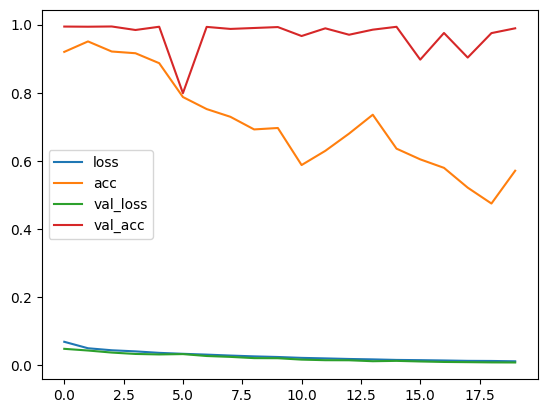

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
pd.DataFrame(history.history).plot()
plt.show()

In [36]:
model.save('DropOut_ToxicPredict.h5')

NameError: name 'model' is not defined

### predictions

In [37]:
input_text = vectorize("Are you Stupid") # Basic check.
print(input_text)

tf.Tensor([ 20   7 563 ...   0   0   0], shape=(2000,), dtype=int64)


In [39]:
# model.predict(np.array[input_text])

model2.predict(np.expand_dims(input_text,0))

array([[0.96110576, 0.03755979, 0.4893339 , 0.01091688, 0.6752211 ,
        0.00626051]], dtype=float32)

### Test on TestSet

In [40]:
batch_x, batch_y = test.as_numpy_iterator().next()

In [42]:
(model2.predict(batch_x) > 0.5).astype(int)

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

### Model Evaluation

In [43]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

pre = Precision()
rec = Recall()
acc = CategoricalAccuracy()

In [44]:
for batch in test.as_numpy_iterator():
    x_true, y_true = batch
    yhat = model2.predict(x_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    
    pre.update_state(y_true, yhat)
    rec.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

In [45]:
print(f'Precision  :{pre.result().numpy()}')
print(f'Recall  :{rec.result().numpy()}')
print(f'Accuracy  :{acc.result().numpy()}')

Precision  :0.9530141949653625
Recall  :0.9623993039131165
Accuracy  :0.4503012001514435


### USER INTERFACE

In [46]:
!pip install gradio jinja2

In [47]:
import tensorflow as tf
import gradio as gr

model = tf.keras.models.load_model("DropOut_ToxicPredict.h5")

In [48]:
# good text check
text_check = vectorize('I will help you without a doubt')

res = model.predict(np.expand_dims(text_check, 0))
print(res > 0.5)

train_data.columns[2:]

[[False False False False False False]]


Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [49]:
#Toxic check
hate_check = vectorize('I will kill you and your family! you suck')
res = model.predict(np.expand_dims(hate_check, 0))
print(res)
print(res>0.5)
train_data.columns[2:]

[[0.9647006  0.37671682 0.92829704 0.8621301  0.8029454  0.27819315]]
[[ True False  True  True  True False]]


Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [50]:
train_data.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [51]:
def new_comment_interface(comment):
    vectorize_comment = vectorize([comment])
    results = model.predict(vectorize_comment)
    
    text = ''
    for idx, col in enumerate(train_data.columns[2:]):
        text += '{}: {}\n'. format(col, results[0][idx]>0.5)
    return text

In [52]:
interface = gr.Interface(fn = new_comment_interface,
                        inputs = gr.inputs.Textbox(lines = 2, placeholder = 'post_comment to check'),outputs = 'text')

interface.launch(share = True)

/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/ndip/miniconda3/envs/neural/lib/python3.8/site-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://4717621b9ccd1a5b6f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
